# Un experimento de estrategias de inicialización de K-means en el conjunto de datos de dígitos escritos a mano.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import completeness_score
from sklearn.datasets import load_digits
from scipy import stats
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import silhouette_score

In [41]:
def reshape(row_image):
    return row_image.reshape(8, 8)

def dibujar_numeros(imagenes, titulo, labels):
    fig, axs = plt.subplots(2, 5, figsize=(18, 8), sharey=True)
    
    for i in range(2):
        for j in range(5):
            axs[i][j].imshow(imagenes[i*5+j], cmap='Greys')
            axs[i][j].set_title(labels[i*5+j])

    fig.suptitle(titulo, fontsize=18)
    
    
def etiquetar_centroides():
    """Asignación de los clusters a un número"""

In [42]:
digits = load_digits()
X_train = digits['data']
y_train = digits['target']

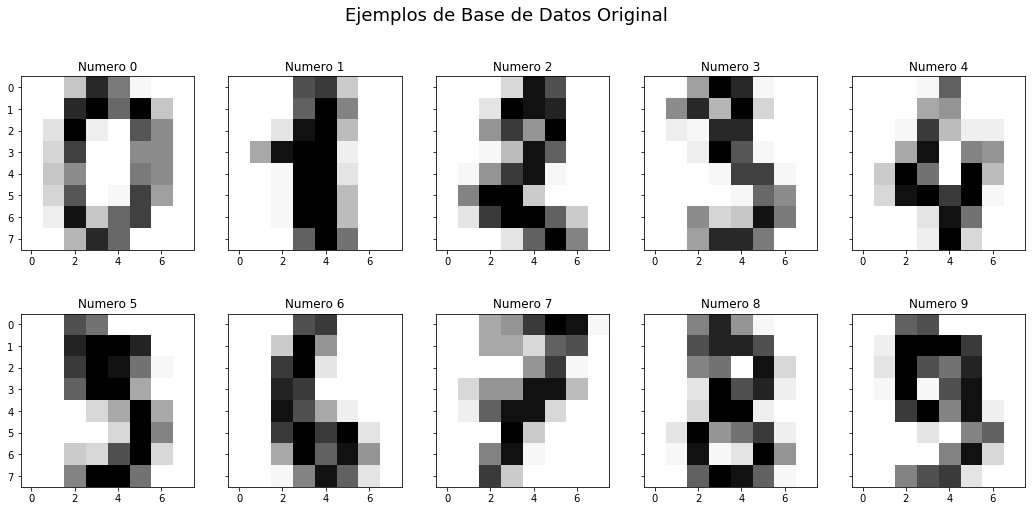

In [43]:
dibujar_numeros(digits.images, 'Ejemplos de Base de Datos Original', ["Numero "+str(i) for i in range(10)])

## Inicializando k-means aleatoriamente 

In [44]:
%%time
kmeans_rand = KMeans(n_clusters = 10,  random_state=0, init='random').fit(X_train)

CPU times: user 186 ms, sys: 3.95 ms, total: 189 ms
Wall time: 188 ms


In [45]:
centroides = np.array([stats.mode(kmeans_rand.predict(X_train[y_train == i]))[0][0] for i in range(10)])
centroides[1] = 6
print("Centroides; ", centroides)
print("Números:    ",np.array([i for i in range(10)]))

Centroides;  [7 6 2 0 4 9 3 5 1 8]
Números:     [0 1 2 3 4 5 6 7 8 9]


In [46]:
centroides

array([7, 6, 2, 0, 4, 9, 3, 5, 1, 8], dtype=int32)

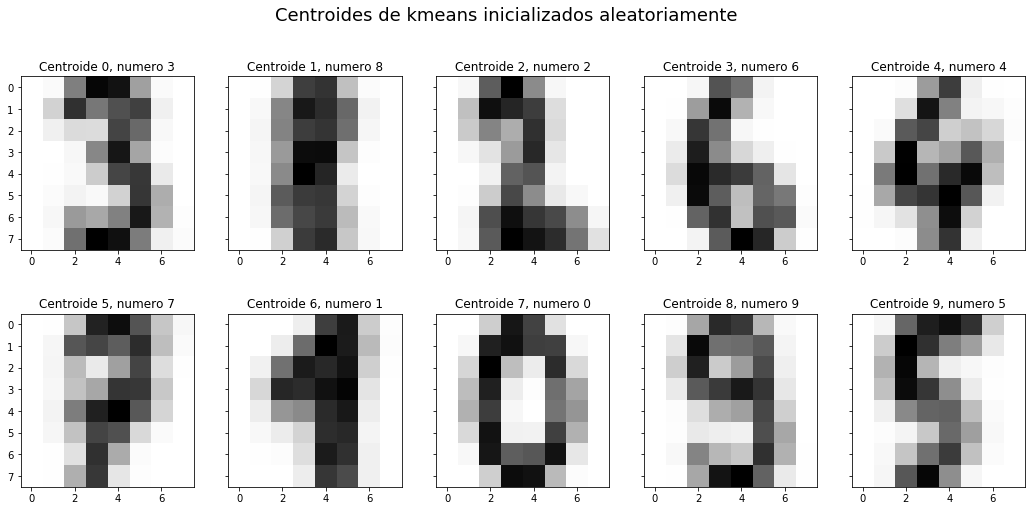

In [47]:
rand_imagenes = [reshape(cent) for cent in kmeans_rand.cluster_centers_]
labels = [' ' for i in range(10)]

for ce in range(len(centroides)):
    labels[centroides[ce]] = "Centroide "+ str(centroides[ce]) + ", numero " + str(ce)
    
dibujar_numeros(rand_imagenes, 'Centroides de kmeans inicializados aleatoriamente', labels)

In [48]:
# Cambiando los centroidees por sus etiquetas
dicc = {}
for ce in range(len(centroides)):
    dicc[centroides[ce]] = ce

predictions_rand = kmeans_rand.predict(X_train)
predictions_rand = np.array([dicc[i] for i in predictions_rand])
accuracy_rand = (predictions_rand == y_train).mean()
print(accuracy_rand)

0.7924318308291597


## Inicializando k-means usando k-means ++

In [49]:
%%time
kmeans_plus = KMeans(n_clusters = 10,  random_state=0, init='k-means++').fit(X_train)

CPU times: user 1.06 s, sys: 12 ms, total: 1.07 s
Wall time: 273 ms


In [50]:
centroides = [stats.mode(kmeans_plus.predict(X_train[y_train == i]))[0][0] for i in range(10)]
centroides[1] = 6
print("Centroides; ", centroides)
print("Números:    ", [i for i in range(10)])

Centroides;  [5, 6, 8, 1, 0, 2, 9, 4, 7, 3]
Números:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


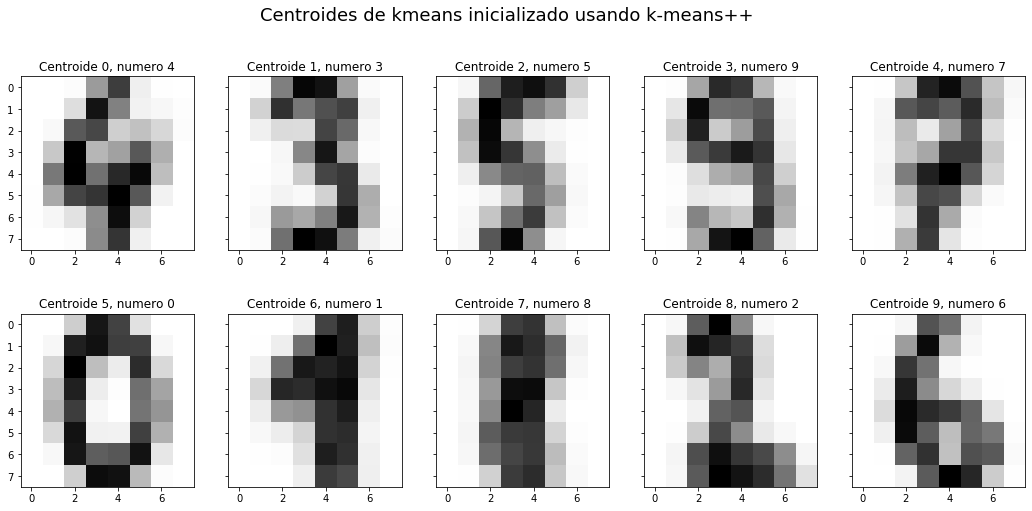

In [51]:
plus_imagenes = [reshape(cent) for cent in kmeans_plus.cluster_centers_]
labels = ['' for i in range(10)]

for ce in range(len(centroides)):
    labels[centroides[ce]] = "Centroide "+ str(centroides[ce]) + ", numero " + str(ce)
    
dibujar_numeros(plus_imagenes, 'Centroides de kmeans inicializado usando k-means++', labels)

In [52]:
# Cambiando los centroidees por sus etiquetas
dicc = {}
for ce in range(len(centroides)):
    dicc[centroides[ce]] = ce

predictions_plus = kmeans_rand.predict(X_train)
predictions_plus = np.array([dicc[i] for i in predictions_rand])
accuracy_plus = (predictions_rand == y_train).mean()
print(accuracy_plus)

0.7924318308291597


## Usando PCA

In [62]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_train)

In [63]:
%%time
kmeans_pca = KMeans(n_clusters = 10,  random_state=0).fit(X_reduced)
predictions_pca = kmeans_pca.predict(X_reduced)

CPU times: user 710 ms, sys: 31.9 ms, total: 742 ms
Wall time: 188 ms


In [64]:
centroides_pca = kmeans_pca.cluster_centers_
centroides_pca_dimOr = pca.inverse_transform(centroides_pca)

centroides = [stats.mode(kmeans_pca.predict(X_reduced[y_train == i]))[0][0] for i in range(10)]
centroides[1] = 6
print("Centroides; ", centroides)
print("Números:    ",[i for i in range(10)])


predictions_pca = kmeans_pca.predict(X_train)
predictions_pca = np.array([dicc[i] for i in predictions_rand])




accuracy_plus = (predictions_rand == y_train).mean()
print(accuracy_plus)

Centroides;  [2, 6, 1, 7, 0, 5, 4, 3, 6, 9]
Números:     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 0.98, 'Categorical Plotting')

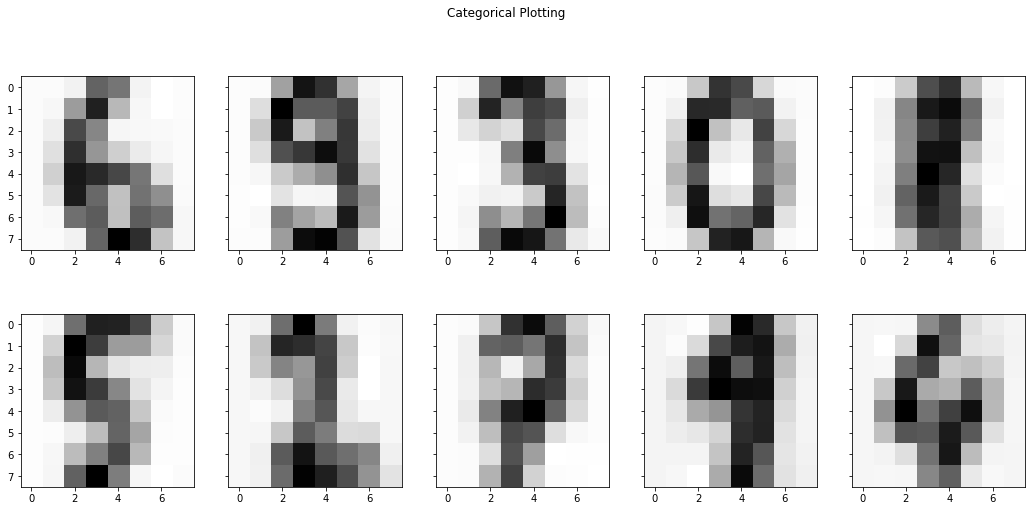

In [55]:
fig, axs = plt.subplots(2, 5, figsize=(18, 8), sharey=True)

axs[0][0].imshow(centroides_pca_dimOr[0], cmap='Greys')
axs[0][1].imshow(centroides_pca_dimOr[1], cmap='Greys')
axs[0][2].imshow(centroides_pca_dimOr[2], cmap='Greys')
axs[0][3].imshow(centroides_pca_dimOr[3], cmap='Greys')
axs[0][4].imshow(centroides_pca_dimOr[4], cmap='Greys')
axs[1][0].imshow(centroides_pca_dimOr[5], cmap='Greys')
axs[1][1].imshow(centroides_pca_dimOr[6], cmap='Greys')
axs[1][2].imshow(centroides_pca_dimOr[7], cmap='Greys')
axs[1][3].imshow(centroides_pca_dimOr[8], cmap='Greys')
axs[1][4].imshow(centroides_pca_dimOr[9], cmap='Greys')

fig.suptitle('Categorical Plotting')

Al contrario del aprendizaje supervisado donde tenemos la verdad básica para evaluar el rendimiento del modelo, el análisis de agrupamiento no tiene una métrica de evaluación sólida que podamos usar para evaluar el resultado de diferentes algoritmos de agrupamiento. Además, dado que kmeans requiere k como entrada y no lo aprende de los datos, no hay una respuesta correcta en términos de la cantidad de clústeres que deberíamos tener en cualquier problema. A veces, el conocimiento del dominio y la intuición pueden ayudar, pero generalmente ese no es el caso.

### Inertia
La inercia o la suma de cuadrados de la distancia dentro del grupo es una medida clave para evaluar la coherencia interna de la agrupación. La suma de la distancia al cuadrado se calcula entre cada punto y su centroide más cercano.
### Homogeneidad
El resultado de la agrupación debería satisfacer la homogeneidad. Significa que cada punto solo pertenece a un grupo.
### Medida de integridad (Completeness)
La integridad mide qué tan bien el algoritmo K-means asigna todos los puntos de datos con una etiqueta dada al mismo grupo. Mientras tanto, el puntaje debe estandarizarse de 0.0 a 1.0
### V-Measure
Mide los criterios armónicos si ha satisfecho la homogeneidad y la integridad. Además, el puntaje es de 0.0 a 1.0.
### Análisis Silhouette
se puede usar para determinar el grado de separación entre grupos.



In [56]:
print('Inertia: ', kmeans_plus.inertia_)
print('homogeneity_score: ', homogeneity_score(predictions_plus, y_train))
print('completeness_score', completeness_score(predictions_plus, y_train))
print('v_measure_score: ', v_measure_score(predictions_plus, y_train))
print('silhouette_score: ',silhouette_score(X_train, y_train))

Inertia:  1165177.713706214
homogeneity_score:  0.7479877466261227
completeness_score 0.7394440631048553
v_measure_score:  0.7436913677648186
silhouette_score:  0.1629432052257522


In [57]:
print('Inertia: ', kmeans_rand.inertia_)
print('homogeneity_score: ', homogeneity_score(predictions_rand, y_train))
print('completeness_score', completeness_score(predictions_rand, y_train))
print('v_measure_score: ', v_measure_score(predictions_rand, y_train))
print('silhouette_score: ',silhouette_score(X_train, y_train))

Inertia:  1165142.0046186212
homogeneity_score:  0.7479877466261227
completeness_score 0.7394440631048553
v_measure_score:  0.7436913677648186
silhouette_score:  0.1629432052257522


In [59]:
print('Inertia: ', kmeans_pca.inertia_)
print('homogeneity_score: ', homogeneity_score(predictions_rand, y_train))
print('completeness_score', completeness_score(predictions_rand, y_train))
print('v_measure_score: ', v_measure_score(predictions_rand, y_train))
print('silhouette_score: ',silhouette_score(X_train, y_train))

Inertia:  633202.6307470213
homogeneity_score:  0.7479877466261227
completeness_score 0.7394440631048553
v_measure_score:  0.7436913677648186
silhouette_score:  0.1629432052257522


**Table 1. Evaluation results on three classical initialization strategies.**:

<table width="1250" >
    <tr>
        <td>
        </td>
        <td>
           Init time
        </td>
        <td>
           Inertia
        </td>
         <td>
            Homogeneity
        </td>
         <td>
            Completeness
        </td>
         <td>
            V-measure
        </td>
    </tr>
        <tr>
        <td>
            K-means++
        </td>
        <td>
           145 ms
        </td>
        <td>
           1165177.713706214
        </td>
         <td>
            0.7479877466261227
        </td>
         <td>
            0.7394440631048553
        </td>
         <td>
            0.7436913677648186
        </td>
    </tr>
        <tr>
        <td>
            Random
        </td>
        <td>
           162 ms
        </td>
        <td>
           1165142.0046186212
        </td>
        <td>
           0.7479877466261227
        </td>
        <td>
            0.7394440631048553
        </td>
        <td>
            0.7436913677648186
        </td>    
    </tr>
        <tr>
        <td>
            PCA-based
        </td>
        <td>
            188 ms
        </td>
        <td>
           633202.6307470213
        </td>
         <td>
            0.673
        </td>
         <td>
            0.715
        </td>
         <td>
            0.693
        </td>
    </tr>
</table>

In [61]:
633202.6307470213/1165142.0046186212

0.5434553283951715